# PISA Data Exploration
## by Yueh-Han Chen

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 
Around 510,000 students in 65 [economies](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm) took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

>Exploration Question : Are there differences in final score based on gender, parents' educational backgrounds, or student attitudes, etc?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load data
pisa_df = pd.read_csv('pisa2012.csv', encoding='latin-1')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# look at its shape
pisa_df.shape

(485490, 636)

### What is the structure of my dataset?

> The dataset includes 485490 rows and 636 columns.

### What is/are the main feature(s) of interest in my dataset?

> W_FSTUWT is the final student weights.

### What features in the dataset do you think will help support my investigation into your feature(s) of interest?

> ST04Q01(gender), AGE, ST14Q01(if their mothers have bachelor's degree ?), IC01Q04(if their fathers have bachelor's degree ?), ST26Q06(if they can use internet?), ST88Q01(negative attitude towards school), OUTHOURS(Out_of_School_Study_Time)

> Rename the variables that I need

In [5]:
# rename the column names that I want to investigate to be undertandable
pisa_df.rename(columns={'W_FSTUWT':'final_weight','ST04Q01':'gender', 'ST14Q01':"mothers_had_studied_in_college",
                        'ST18Q01':"fathers_had_studied_in_college",
                        'IC01Q04':'have_internet', 'ST88Q01':'negative_attitude_towards_school',
                        'OUTHOURS': 'Out_of_School_Study_Time'}, inplace=True)

> Build function

In [134]:
def desc(xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks=None, yticks=None):
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks:
        plt.xticks(xticks, xticks);
    if yticks:
        plt.yticks(yticks, yticks);

## Univariate Exploration

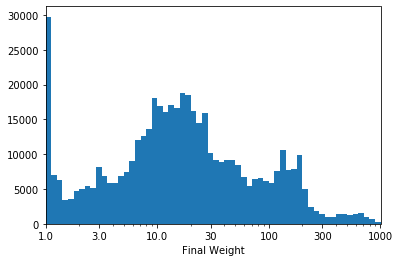

In [124]:
# Let's look at the main feature: final weight and understand how it distributes
bin_edges = 10 ** np.arange(0, 7.86+0.01, 0.05)
plt.hist(pisa_df['final_weight'], bins = bin_edges);
desc(xscale='log', xlabel='Final Weight', xticks=[1.0, 3.0, 10.0, 30, 100, 300, 1000], xlim=(1,1000))

In [7]:
# let's look at how man percantage of each divided weight ranges of under 10, under 30, under 100, and under 300
pisa_df.query('final_weight<=10').count()['gender']/pisa_df.shape[0],pisa_df.query('final_weight<=30').count()['gender']/pisa_df.shape[0],pisa_df.query('final_weight<=100').count()['gender']/pisa_df.shape[0],pisa_df.query('final_weight<=300').count()['gender']/pisa_df.shape[0]

(0.36396630208655173,
 0.6856907454324497,
 0.8518342293353107,
 0.9749490205771488)

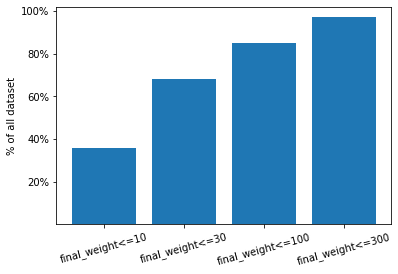

In [8]:
# visualize it
plt.bar([1, 2, 3, 4], [36, 68, 85, 97])
plt.xticks([1, 2, 3, 4], ['final_weight<=10', 'final_weight<=30', 'final_weight<=100', 'final_weight<=300'], rotation=15);
plt.yticks(range(20,120,20),['20%','40%','60%','80%','100%','']);
plt.ylabel('% of all dataset');

> It's a bimodal distributioon in final weight and above 80% of the data is under 100 weight. Besides, I found a strange data here in 1 final weight, maybe those are the students who just scrabbled the test or there had some problems with the scores.

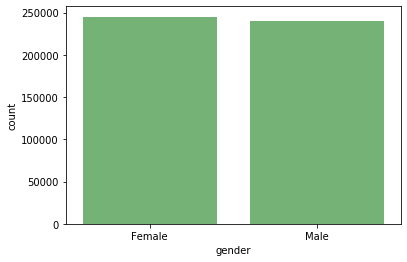

In [9]:
# Question: whether there is unequal numbers of gender
# visualize the number of each gender
base_color = sb.color_palette()[2]
sb.countplot(data = pisa_df, x = 'gender', color = base_color, alpha =0.7)

> almost 50/50 of genders in the dataset.

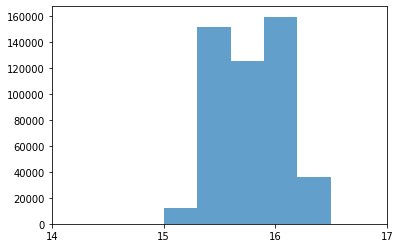

In [125]:
# Question: what is the distribution of the age?
bin_edges = np.arange(0, pisa_df['AGE'].max()+0.3, 0.3)
plt.hist(data = pisa_df, x = 'AGE', bins = bin_edges, alpha = 0.7);
desc(xlim=(14,17),xticks=range(14,18))

> It's a unimodal graph and the average is 15.8 year-old kids in this dataset.

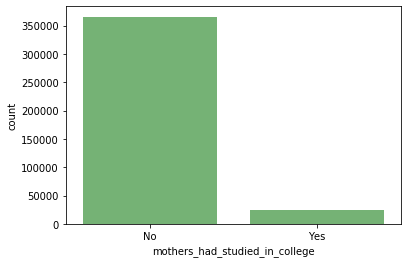

In [11]:
# Question: how many students' mothers had studied in college?
base_color = sb.color_palette()[2]
sb.countplot(data = pisa_df, x = 'mothers_had_studied_in_college', color = base_color, alpha =0.7);

> Only around 25000 kids' mothers in the dataset had studied in college.

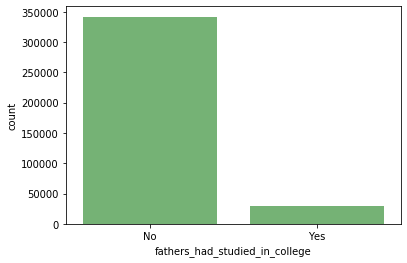

In [12]:
# Question: how many students' fathers had studied in college?
base_color = sb.color_palette()[2]
sb.countplot(data = pisa_df, x = 'fathers_had_studied_in_college', color = base_color, alpha =0.7);

> Only around 30000 kids' fathers in the dataset had studied in college. I will compare it and last mother data with the fina weight in the mutivariate section. 

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


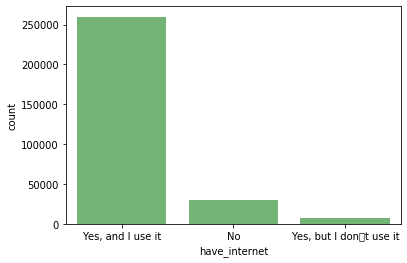

In [13]:
# Question: how many students have internet?
base_color = sb.color_palette()[2]
sb.countplot(data = pisa_df, x = 'have_internet', color = base_color, alpha =0.7);

Around 85% of the testers have internet.

(0, 160000)

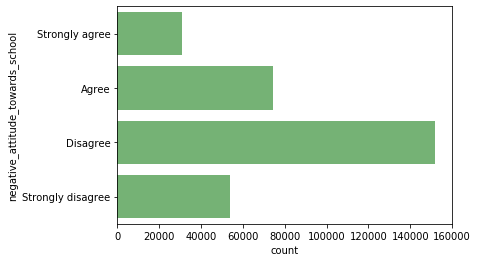

In [14]:
# Question: What is the numbers of students' each kind of attitude towrads school?
base_color = sb.color_palette()[2]
order = ['Strongly agree','Agree','Disagree','Strongly disagree']
sb.countplot(data = pisa_df, y = 'negative_attitude_towards_school', color = base_color, alpha =0.7, order = order);
plt.xlim(0,160000)

> Above 70% of students do not have the negative attitude towards school.

In [15]:
# Question: what is the distribution of hous spent on studying out of school?
# because the distribution of study time will be decreased expotentially, so I chose to use log to view the distribution

np.log10(pisa_df['Out_of_School_Study_Time']).describe()

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.087990e+05
mean             -inf
std               NaN
min              -inf
25%      6.020600e-01
50%      9.030900e-01
75%      1.146128e+00
max      2.255273e+00
Name: Out_of_School_Study_Time, dtype: float64

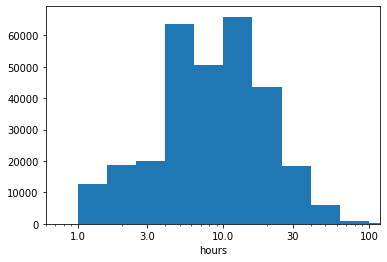

In [126]:
# Visualize it
bin_edges = 10 ** np.arange(-1, 2.25+0.2, 0.2)
plt.hist(pisa_df['Out_of_School_Study_Time'], bins = bin_edges);
desc(xscale='log', xlabel='hours', xticks=[1.0, 3.0, 10.0, 30, 100],xlim=(0.6,120) )

> Most students spend under 10 hours studying out of the school per week.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found a strange point in final weight score 1, maybe those are the students who just scrabbled the test or there had some problems with the scores.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I transformed the 'Out_of_School_Study_Time' and 'W_FSTUWT' graphs to log distributions.

## Bivariate Exploration

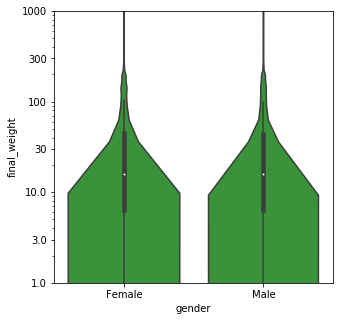

In [135]:
# Question: whether gender affect the final weight?  
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
desc(yscale='log', yticks=[1.0, 3.0, 10.0, 30, 100, 300, 1000],ylim=(1,1000))
sb.violinplot(data = pisa_df, x = 'gender', y = 'final_weight', color=base_color)

> There is almost no difference in final weight between genders. 

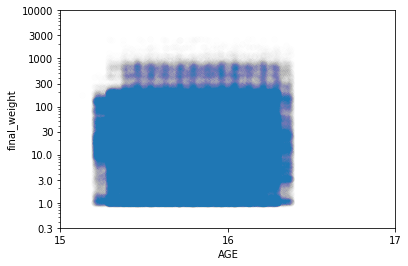

In [136]:
# Question: whether age affect the final weight?
sb.regplot(data = pisa_df, x = 'AGE', y = 'final_weight', fit_reg = False,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.002})
desc(xlim=(15,17), xticks=range(15,18), yscale='log', yticks=[0.3,1.0, 3.0, 10.0, 30, 100, 300, 1000, 3000,10000],ylim=(0.3,10000))

> There is almost no difference in final weight between ages in 15 to 16.5 years old, but fewer students got weight over 300 in age 15.2 to 15.4.

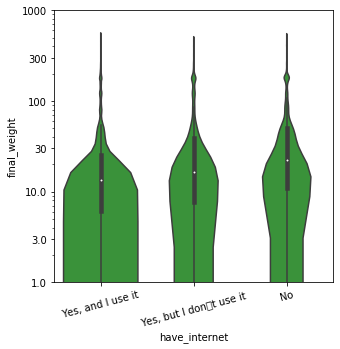

In [137]:
# Question: whether students who use internet got lower final weight?
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
desc(yscale='log', yticks=[1.0, 3.0, 10.0, 30, 100, 300, 1000], ylim=(1,1000))
sb.violinplot(data = pisa_df, x = 'have_internet', y = 'final_weight', color=base_color, order=['Yes, and I use it','Yes, but I dont use it', 'No'])
plt.xticks(rotation=15);

> yes, Students with internet tend to get lower final weights, whose median is around 12, but students'  without internet at home have medium final weights of 20.

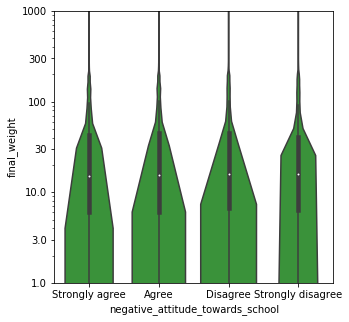

In [140]:
# Question: Whether students' attitude towards school affect their final weight? 
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
order = ['Strongly agree','Agree','Disagree','Strongly disagree']
desc(yscale='log', yticks= [1.0, 3.0, 10.0, 30, 100, 300, 1000], ylim=(1,1000))
sb.violinplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', color=base_color, order = order)

> Yes, and the mode of final weights of each 4 attitudes toward school increased from strongly negative attitude to strongly positive attitude.

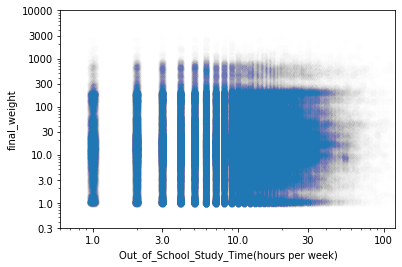

In [141]:
# Question: whether time been spent studying out of school affect the final weight? 
sb.regplot(data = pisa_df, x = 'Out_of_School_Study_Time', y = 'final_weight', fit_reg = False,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.002})
desc(xscale='log',xlabel='Out_of_School_Study_Time(hours per week)', xticks=[1.0, 3.0, 10.0, 30, 100],
     xlim=(0.6,120), yscale='log', yticks=[0.3,1.0, 3.0, 10.0, 30, 100, 300, 1000, 3000,10000], ylim=(0.3,10000))

> I cannot see any useful insight from this graph, let's look at the line chart of each average final weights by the study time.

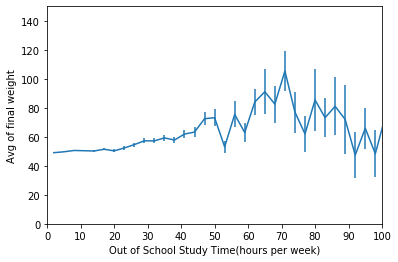

In [142]:
# Let's see the line chart of the relationship of time been spent studying out of school and the average final weight
bin_size = 3
xbin_edges = np.arange(0.5, pisa_df['Out_of_School_Study_Time'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(pisa_df['Out_of_School_Study_Time'], xbin_edges, right = False, include_lowest = True)
y_means = pisa_df['final_weight'].groupby(data_xbins).mean()
y_sems = pisa_df['final_weight'].groupby(data_xbins).sem()  #std

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
desc(xticks=range(0,110,10), xlim=(0,100), xlabel='Out of School Study Time(hours per week)',
    ylabel='Avg of final weight', ylim=(0,150))

> Students typically got higher final weigts when they spent more time studying out of school, but when they studied beyond 70 hours, their final weight would start to decrease. 
Students with 70 hours study time out of school got the highest average final weight.

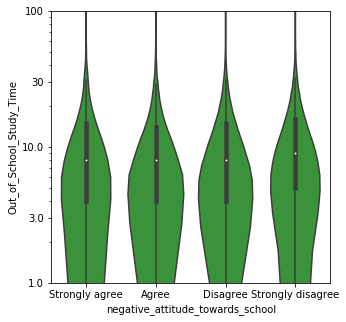

In [143]:
# Question: whether students' attitudes toward school affect the time been spent studying out of school ?
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
order = ['Strongly agree','Agree','Disagree','Strongly disagree']
desc(yscale='log', yticks=[1.0, 3.0, 10.0, 30, 100], ylim=(1,100))
sb.violinplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'Out_of_School_Study_Time', color=base_color, order = order)

> There is almost no difference in study time out of school between students' attitude toward school

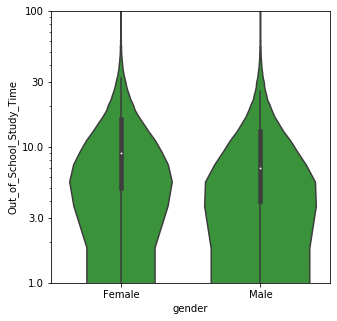

In [144]:
# Question: whether gender affect the time been spent studying out of school ?
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
desc(yscale='log', yticks=[1.0, 3.0, 10.0, 30, 100], ylim=(1,100))
sb.violinplot(data = pisa_df, x = 'gender', y = 'Out_of_School_Study_Time', color=base_color)

> Male students tend to spend time between 1 to 10 hours studying out of school, but female students tend to spend time between 3 to 10 hours studying out of school

In [145]:
#Create a new column called "parents_had_studied_in_college" includes values of 'no','dad only','mom only','both
pisa_df['parents_had_studied_in_college'] = None
mom_yes_list = list(pisa_df.query("mothers_had_studied_in_college == 'Yes'").index)
mom_no_list = list(pisa_df.query("mothers_had_studied_in_college == 'No'").index)
dad_yes_list = list(pisa_df.query("fathers_had_studied_in_college == 'Yes'").index)
dad_no_list = list(pisa_df.query("fathers_had_studied_in_college == 'No'").index)
both_yes_list = list(set(mom_yes_list).intersection(dad_yes_list)) 
both_no_list = list(set(mom_no_list).intersection(dad_no_list)) 

for i in mom_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'mom only'
for i in dad_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'dad only'
for i in both_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'both'
for i in both_no_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'no'

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

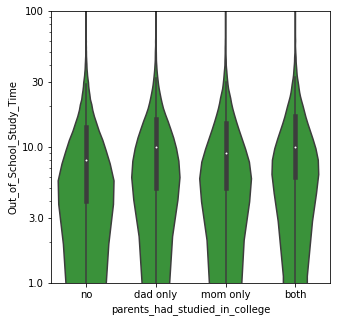

In [146]:
# Question: whether students' parents had studied in college affect the time been spent studying out of school ?
plt.figure(figsize=(5,5))
base_color = sb.color_palette()[2]
desc(yscale='log',yticks= [1.0, 3.0, 10.0, 30, 100],ylim=(1,100))
sb.violinplot(data = pisa_df, x = 'parents_had_studied_in_college',
              y = 'Out_of_School_Study_Time', color=base_color,
             order = ['no','dad only','mom only','both'])

> I found that out of school study time increase from students' parents without studying in college to both of them had studiedd in college.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Students with internet tend to get lower final weights, whose median is around 12, but students' without internet at home have medium final weights of 20.

> 2. The mode of final weights of each 4 attitudes toward school increased from strongly negative attitude to strongly positive attitude.

> 3. Students typically got higher final weigts when they spent more time studying out of school, but when they studied beyond 70 hours, their final weight started to decrease. Students with 70 hours study time out of school got the highest average final weight.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. Male students tend to spend time between 1 to 10 hours studying out of school, but female students tend to spend time between 3 to 10 hours studying out of school

> 2. out of school study time increase from students' parents without studying in college to both of them had studiedd in college.

## Multivariate Exploration

Text(0.5, 1.0, 'final weight by gender and negative_attitude_towards_school')

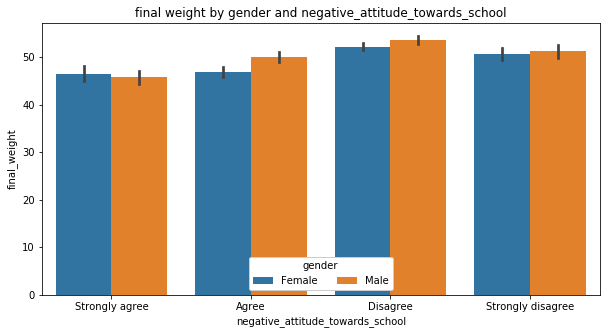

In [52]:
# Question: whether students' attitudes toward school affect the average final weight?
plt.figure(figsize=(10,5))
ax = sb.barplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', hue = 'gender',
               order = ['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
plt.title('final weight by gender and negative_attitude_towards_school')

> From the plot: final weight by gender and negative_attitude_towards_school, the difference in negative_attitude_towards_school is not obvious, so I can only know that people tend to get higher final weight when they are positive towards school.

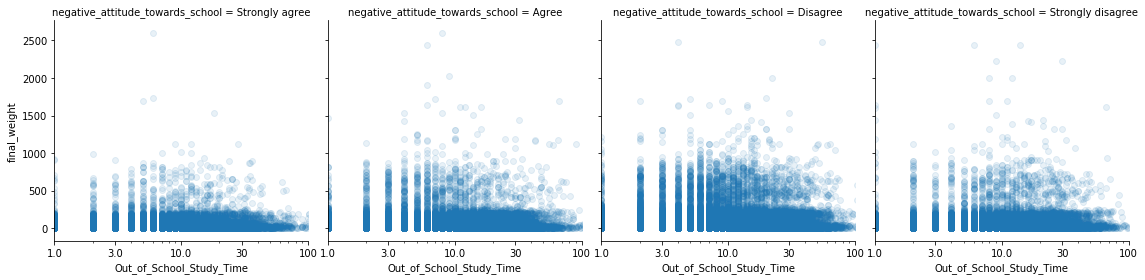

In [147]:
# Question: whether students' attitudes toward school affect the time been spent studying out of school ?

g = sb.FacetGrid(data = pisa_df, col = 'negative_attitude_towards_school', size = 4, col_order=['Strongly agree','Agree','Disagree','Strongly disagree'],
                margin_titles = True)
g.map(plt.scatter, 'Out_of_School_Study_Time','final_weight',alpha=0.1)
desc(xscale='log', xticks = [1.0, 3.0, 10.0, 30, 100], xlim=(1,100))

> This result makes sense: When students with positive attitude towards school, they tend to sped more time studying out of school, which leads to higher final weight

Text(0.5, 1.0, "final weight by parents' education and students' negative attitude towards school")

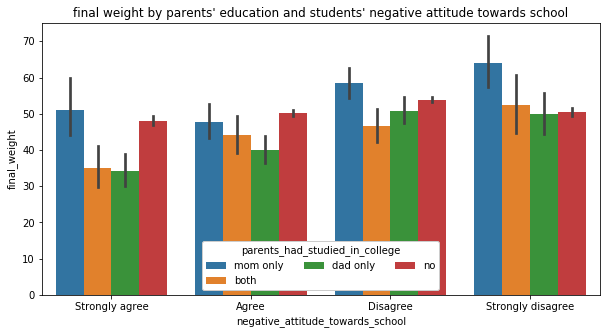

In [88]:
# Question: What's the relationship of students' attitudes toward school and whether their parents had studied in college?
# and how they affect the final weight?
plt.figure(figsize=(10,5))
ax = sb.barplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', hue = 'parents_had_studied_in_college',
               order = ['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'parents_had_studied_in_college')
plt.title("final weight by parents' education and students' negative attitude towards school");

> From this graph, I can tell that students' strongly positive attitude towards school got average 10 higher final weight that students with negative attitude.
And, parents that only mom had studied in college tend to lead their kids got higher final weight.

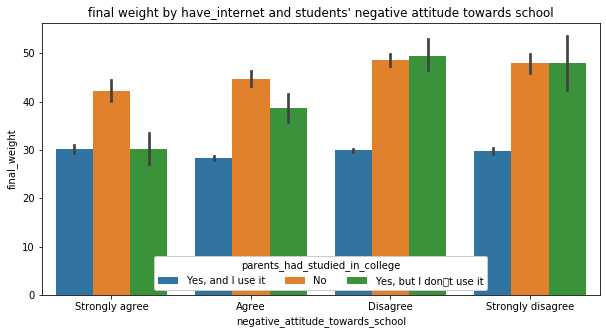

In [103]:
# Question: What's the relationship of students' attitudes toward school and whether they have internet?
# and how they affect the final weight?
plt.figure(figsize=(10,5))
ax = sb.barplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', hue = 'have_internet',
               order = ['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'have_internet')
plt.title("final weight by have_internet and students' negative attitude towards school");

> Students who have not or do not use internet got at least 10 final weights higher than those who have and use it. And they usually are positive towards school.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1.Students with pocitive attitude towards school tend to be willing to spend more time studing, which leads to higher weights.

> 2.Students who have not or do not use internet got at least 10 final weights higher than those who have and use it. And they usually are positive towards school.

### Were there any interesting or surprising interactions between features?

> parents that only mom had studied in college tend to lead their kids got higher final weight.

# Conclusion


### Research Question: Exploration Question : Are there differences in final weight based on gender, parents' educational backgrounds,  students' attitude or internet, etc?

> 1.Students who use internet tend to get average 11 final weights lower than those who do not use or do not have internet.

> 2.Students with strongly positive attitude towards school got average 4 final weight higher than those students with negative attitude.

> 3.Students typically got higher final weigts when they spent more time studying out of school, but when they studied beyond 70 hours, their final weight started to decrease. Students with 70 hours study time out of school got the highest average final weight.

> 4.In terms of whether their parents had studied in college affect their final weight, I found that only mom had studied in college tend to lead their kids got 10 final weight higher than only dad, and 11 final weight higher than both, and 3 final weight higher than none.